# Monte Carlo Simulationen

In [1]:
from random import randint, randrange, seed
from time import time
from matplotlib import pyplot as plt
%matplotlib inline


def test(a, b, N):
    l = [randint(a, b) for _ in range(N)]
    return {i: l.count(i) for i in range(a, b + 1)}


def test_falsch(a, b, N):
    l = [(randint(a, b), seed(int(time())))[0] for _ in range(N)]
    return {i: l.count(i) for i in range(a, b + 1)}


def visulize(a, b, N, f):
    draw = f(a, b, N)
    x = list(draw.keys())
    y = list(draw.values())
    plt.plot(x, y)
    plt.show()

## Aufgabe 1
### a)

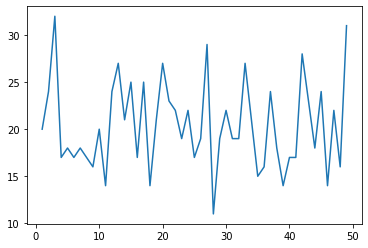

In [2]:
seed(2<<16-1)
visulize(1, 49, 1000, test)

### b)

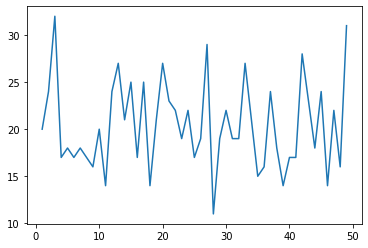

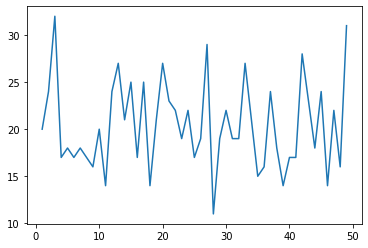

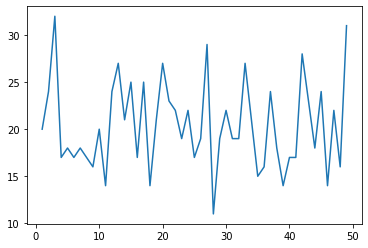

In [3]:
for _ in range(3):
    seed(2<<16-1)
    visulize(1, 49, 1000, test)

### c)

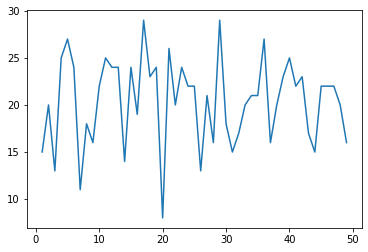

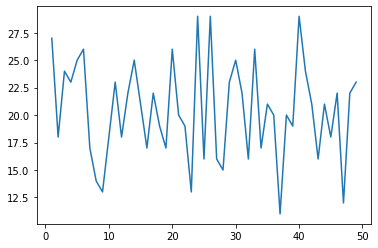

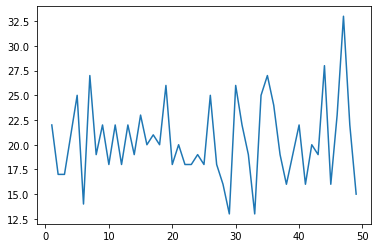

In [4]:
for _ in range(3):
    visulize(1, 49, 1000, test)

### d)

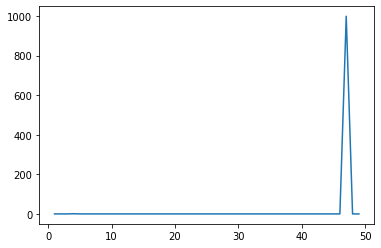

In [5]:
visulize(1, 49, 1000, test_falsch)

## Aufgabe 2

In [6]:
class Lotto:
    def __init__(self, n=-1):
        seed(n) if n >= 0 else seed(time())
    
    def __call__(self, zettel):
        self.zettel = zettel
    
    def draw(self):
        bowl = list(range(1, 50))
        return {bowl.pop(randrange(len(bowl))) for _ in range(6)}
    
    def once(self):
        return len(self.draw() & self.zettel)
    
    def twice(self):
        return len(self.draw() & self.draw())

## Aufgabe 3

In [7]:
mcs = Lotto()
mcs({2, 3, 5, 7, 11, 13})
print(f"""
ONCE:
n = 100000: {sum(mcs.once() == 3 for _ in range(100000))/1000}%
n = 1000000: {sum(mcs.once() == 3 for _ in range(1000000))/10000}%

TWICE:
n = 100000: {sum(mcs.twice() == 3 for _ in range(100000))/1000}%
n = 1000000: {sum(mcs.twice() == 3 for _ in range(1000000))/10000}%
""")


ONCE:
n = 100000: 1.731%
n = 1000000: 1.765%

TWICE:
n = 100000: 1.723%
n = 1000000: 1.7645%

